In [9]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.layers import Convolution1D, MaxPooling1D, AveragePooling1D
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.optimizers import *
import math
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import h5py

In [10]:
data = pd.read_hdf('random_forest.h5')

In [11]:
zips = list(data.zip5.unique())
zips1 = zips[:23]
zips2 = zips[23:46]
zips3 = zips[46:69]
zips4 = zips[69:]
zipsx = [29172]

In [3]:
test = data[data['zip5'] == 17013]
test = test.drop(['zip5', 'datetime'], axis =1)
test_17_18 = test[test['year_2019'] != 1]
y = test_17_18['impact_score']
X = test_17_18.drop(['impact_score'], axis = 1)

In [4]:
y = y[27:]

In [5]:
def rolling_window(a, window):
    shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
    strides = a.strides + (a.strides[-1],)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)

def reshape_X(X, time_interval):
    XT = np.transpose(X.values)
    reshaped_X = np.transpose(rolling_window(XT, time_interval), (1,2,0))
    return reshaped_X

X = reshape_X(X, 28)

In [6]:
test_size = int(0.3 * X.shape[0])
X_train, X_test, y_train, y_test = X[:-test_size], X[-test_size:], y[:-test_size], y[-test_size:]

In [7]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
model = Sequential((
        Convolution1D(input_shape=(28, 173), 
                      kernel_size=4, activation="relu", filters=4),
        MaxPooling1D(),    
        Dropout(0.1),
        Convolution1D(kernel_size=4, activation="relu", filters=4),
        MaxPooling1D(),
        Dropout(0.1),
        Convolution1D(kernel_size=4, activation="relu", filters=4),
        #Convolution1D(kernel_size=4, activation="relu", filters=4),
        Flatten(),
        Dense(1, activation='linear'),
        Dense(1, activation='linear'),
    ))
opt = Adam(lr=0.0001)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mse'])
model.summary()
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
val = model.fit(X_train, y_train, epochs=150, batch_size=5, validation_data=(X_test, y_test), callbacks = [es])
pred = model.predict(X_test)
testScore = math.sqrt(mean_squared_error(y_test,pred))
print('Test Score: %.2f RMSE' % (testScore))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 25, 4)             2772      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 12, 4)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 4)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 9, 4)              68        
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 4, 4)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4)              0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 1, 4)             

2026/2026 [==============================] - 2s 769us/step - loss: 198.3345 - mse: 198.3344 - val_loss: 188.8504 - val_mse: 188.8505
Epoch 45/150
2026/2026 [==============================] - 2s 770us/step - loss: 196.1902 - mse: 196.1902 - val_loss: 186.7503 - val_mse: 186.7503
Epoch 46/150
2026/2026 [==============================] - 2s 793us/step - loss: 194.0532 - mse: 194.0533 - val_loss: 184.6582 - val_mse: 184.6582
Epoch 47/150
2026/2026 [==============================] - 2s 910us/step - loss: 191.9268 - mse: 191.9267 - val_loss: 182.5768 - val_mse: 182.5768
Epoch 48/150
2026/2026 [==============================] - 2s 891us/step - loss: 189.8086 - mse: 189.8086 - val_loss: 180.5020 - val_mse: 180.5020
Epoch 49/150
2026/2026 [==============================] - 2s 774us/step - loss: 187.6989 - mse: 187.6989 - val_loss: 178.4365 - val_mse: 178.4365
Epoch 50/150
2026/2026 [==============================] - 2s 825us/step - loss: 185.5970 - mse: 185.5968 - val_loss: 176.3778 - val_mse: 

Epoch 101/150
2026/2026 [==============================] - 2s 773us/step - loss: 31.4368 - mse: 31.4368 - val_loss: 26.3025 - val_mse: 26.3025
Epoch 102/150
2026/2026 [==============================] - 2s 766us/step - loss: 28.9709 - mse: 28.9709 - val_loss: 24.0086 - val_mse: 24.0086
Epoch 103/150
2026/2026 [==============================] - 2s 768us/step - loss: 26.6110 - mse: 26.6110 - val_loss: 21.8274 - val_mse: 21.8274
Epoch 104/150
2026/2026 [==============================] - 2s 771us/step - loss: 24.3590 - mse: 24.3590 - val_loss: 19.7545 - val_mse: 19.7545
Epoch 105/150
2026/2026 [==============================] - 2s 811us/step - loss: 22.2135 - mse: 22.2135 - val_loss: 17.7944 - val_mse: 17.7944
Epoch 106/150
2026/2026 [==============================] - 2s 785us/step - loss: 20.1835 - mse: 20.1835 - val_loss: 15.9464 - val_mse: 15.9464
Epoch 107/150
2026/2026 [==============================] - 2s 835us/step - loss: 18.2734 - mse: 18.2734 - val_loss: 14.2214 - val_mse: 14.2214

In [159]:
list_values = [ math.log(v) for v in val.history['val_loss'] ]
list_values2 = [math.log(v) for v in val.history['loss']]

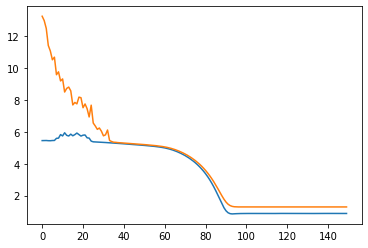

In [160]:
#blue should be above orange
plt.plot(list_values)
plt.plot(list_values2)
plt.show()

In [ ]:
X = np.expand_dims(X, axis = 2)

model = Sequential((
        # The first conv layer learns `nb_filter` filters (aka kernels), each of size ``(filter_length, nb_input_series)``.
        # Its output will have shape (None, window_size - filter_length + 1, nb_filter), i.e., for each position in
        # the input timeseries, the activation of each filter at that position.
        #Convolution1D(nb_filter=nb_filter, filter_length=filter_length, activation='relu', input_shape=(window_size, nb_input_series)),
        Convolution1D(input_shape=(167,1), 
                      kernel_size=4, activation="relu", filters=16),
        MaxPooling1D(),     # Downsample the output of convolution by 2X.
        Dropout(0.2),
        #Convolution1D(nb_filter=nb_filter, filter_length=filter_length, activation='relu'),
        Convolution1D(kernel_size=4, activation="relu", filters=16),
        Dropout(0.2),
        #MaxPooling1D(),
        Flatten(),
        Dense(1, activation='linear'),
        Dense(1, activation='linear'),# For binary classification, change the activation to 'sigmoid'
    ))
opt = Adam(lr=0.001)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mae'])
model.summary()
test_size = int(0.2 * 2862)           # In real life you'd want to use 0.2 - 0.5
#impact = data['impact_score']
#test = data.drop(['date_key', 'impact_score'], axis = 1)
#test = np.expand_dims(test, axis = 2)
X_train, X_test, y_train, y_test = X[:-test_size], X[-test_size:], y[:-test_size], y[-test_size:]
#X_train, X_test, y_train, y_test = train_test_split(test, impact, test_size = 0.3)
model.fit(X_train, y_train, epochs=500, batch_size=25, validation_data=(X_test, y_test))
pred = model.predict(X_test)
#print('\n\nactual', 'predicted', sep='\t')
#for actual, predicted in zip(y_test, pred.squeeze()):
#    print(actual.squeeze(), predicted, sep='\t')
#print('next', model.predict(q).squeeze(), sep='\t')
    
testScore = math.sqrt(mean_squared_error(y_test,pred))
print('Test Score: %.2f RMSE' % (testScore))